# Installing the Dataset from Kaggle

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()


In [ ]:
! mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

In [ ]:
! mkdir input
! unzip house-prices-advanced-regression-techniques.zip -d input

# Import Dependencies

In [241]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [242]:
df = pd.read_csv('./input/train.csv')

# Initial Inspection

In [243]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [245]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


# Dealing with NaNs

In [246]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [247]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [248]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace = True, ascending = False)
missing_value_df

,column_name,percent_missing
PoolQC,PoolQC,99.52
MiscFeature,MiscFeature,96.30
Alley,Alley,93.77
Fence,Fence,80.75
FireplaceQu,FireplaceQu,47.26
...,...,...
ExterQual,ExterQual,0.00
Exterior2nd,Exterior2nd,0.00
Exterior1st,Exterior1st,0.00
RoofMatl,RoofMatl,0.00


PoolQC, MiscFeature, Alley, and Fence columns all have missing values that go above 80%, hence, they will be dropped as a column.

In [249]:
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df.drop(drop_cols, axis = 1, inplace = True)

df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


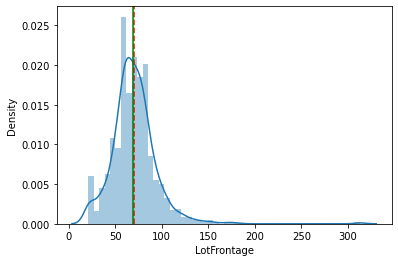

In [250]:
ax = sns.distplot(df['LotFrontage'])

ax.axvline(df['LotFrontage'].mean(), color = 'red', ls = '--')
ax.axvline(df['LotFrontage'].median(), color = 'green')

plt.show()

Data is skewed but not enough that the mean and median is far apart, hence, mean will be used as measure of central tendency which will be used to impute null values.

In [251]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

df['LotFrontage'].isna().sum()

0

In [252]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Since None is an available category, it can be deduced that the null values are also None, given that it's the most frequently occuring (mode). The mode will be used to impute null values.

In [253]:
df['MasVnrType'].fillna('None', inplace = True)
df['MasVnrType'].isna().sum()

0

In [254]:
df['MasVnrArea'].value_counts().sort_values(ascending = False)

0.00      861
72.00       8
108.00      8
180.00      8
120.00      7
         ... 
760.00      1
391.00      1
27.00       1
361.00      1
119.00      1
Name: MasVnrArea, Length: 327, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


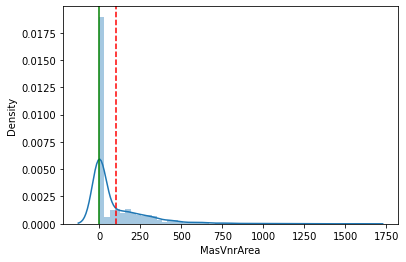

In [255]:
ax = sns.distplot(df['MasVnrArea'])

ax.axvline(df['MasVnrArea'].mean(), color = 'red', ls = '--')
ax.axvline(df['MasVnrArea'].median(), color = 'green')

plt.show()

In [256]:
print(df['MasVnrArea'].mean(), df['MasVnrArea'].median())

103.68526170798899 0.0


Data is skewed, hence, it would be better off to use the median as measure of central tendency to impute null values.

In [257]:
df['MasVnrArea'].fillna(0.0, inplace = True)
df['MasVnrArea'].isna().sum()

0

In [258]:
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[basement_cols].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [259]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

It's understandable to impute null values in all the basement related columns with "NA" as not all houses are equipped with a basement.

In [260]:
for i in basement_cols:
  df[i].fillna('NA', inplace = True)

df[basement_cols].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [261]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

There is only 1 null value in the column.

In [262]:
df['Electrical'].fillna('SBrkr', inplace = True)
df['Electrical'].isna().sum()

0

In [263]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [264]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

As with the basement column, not all houses are equipped with a fireplace, hence, it's understandable to assume that the null values mean "NA".

In [265]:
df['FireplaceQu'].fillna('NA', inplace = True)
df['FireplaceQu'].isna().sum()

0

In [266]:
garage_cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
df[garage_cols].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

Not all houses are also equipped with a garage, hence, they can be filled with "NA".

In [267]:
for i in garage_cols:
  df[i].fillna('NA', inplace = True)

df[garage_cols].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [268]:
df['GarageYrBlt'].dtype

dtype('float64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


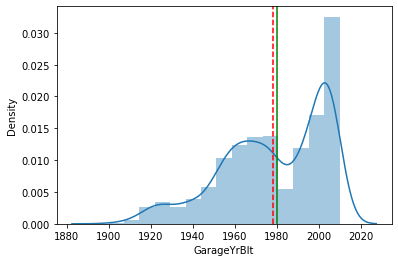

In [269]:
ax = sns.distplot(df['GarageYrBlt'])

ax.axvline(df['GarageYrBlt'].mean(), color = 'red', ls = '--')
ax.axvline(df['GarageYrBlt'].median(), color = 'green')

plt.show()


Data is skewed, which is why median will be used for imputation.

In [270]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)
df['GarageYrBlt'].isna().sum()

0

In [271]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [272]:
categorical_df = list(df.select_dtypes(include = [object]).columns)
numerical_df = list(df.drop(categorical_df, axis = 1).columns)

print(categorical_df, '\n')
print(numerical_df)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch

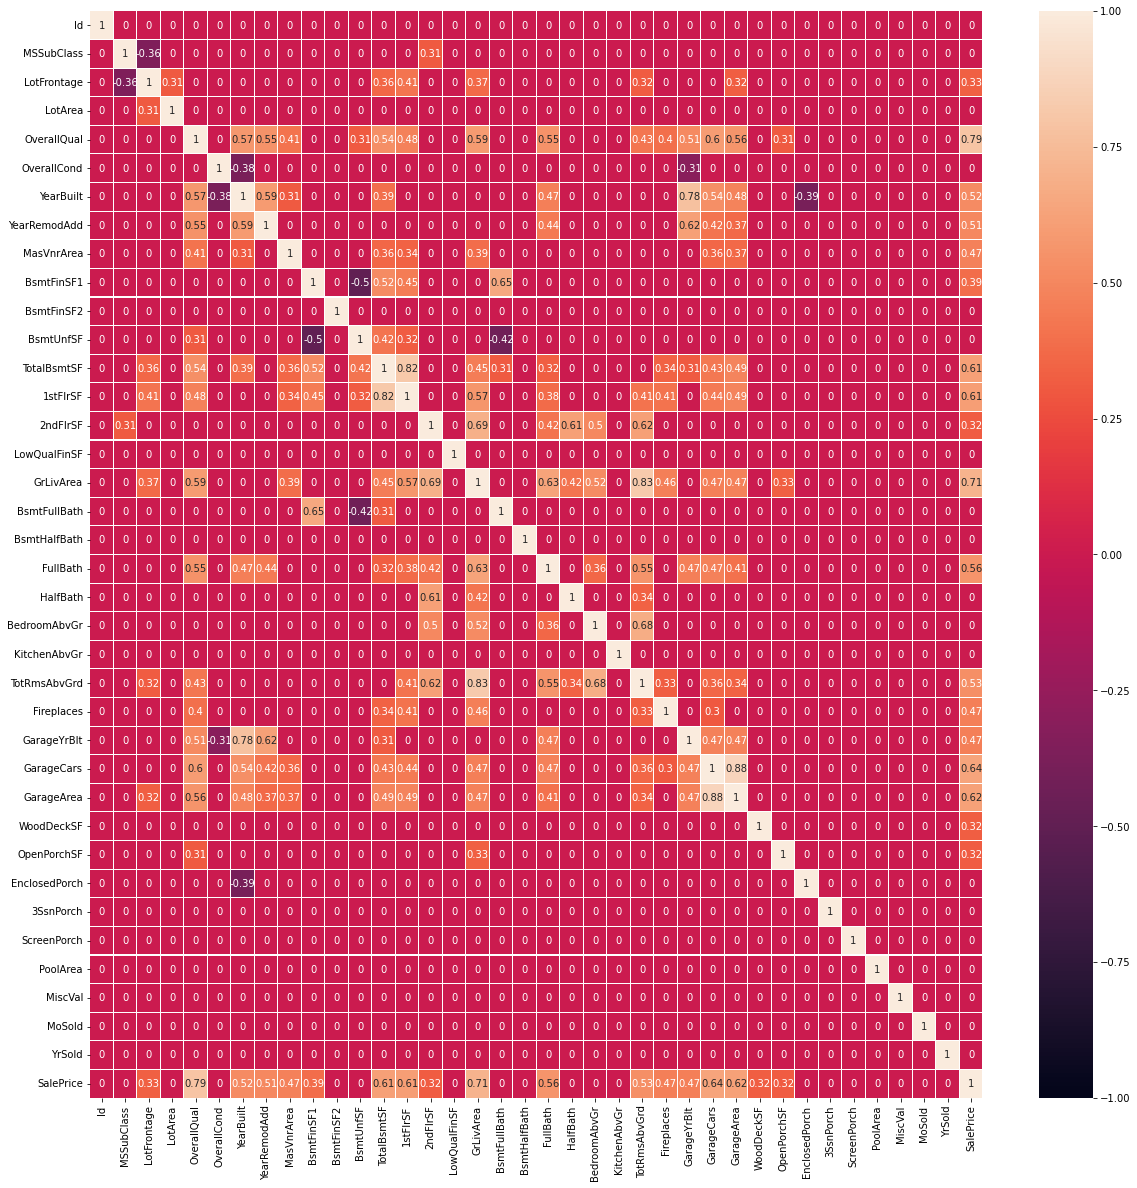

In [273]:
num_corr = df[numerical_df].corr()

num_corr[(num_corr < 0.3) & (num_corr > -0.3)] = 0
plt.figure(figsize = (20, 20))

sns.heatmap(num_corr, vmax = 1.0, vmin = -1.0, linewidths = 0.1, annot = True)

plt.show()

In [274]:
df.corr()['SalePrice'].sort_values(ascending = False)[1:]

OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
GarageYrBlt      0.47
BsmtFinSF1       0.39
LotFrontage      0.33
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
Id              -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64

Features that have a correlation coefficient that's greater than 0.50 are considered.

# Categorical Features Encoding

In [275]:
le = LabelEncoder()

for category in categorical_df:
  df[category] = le.fit_transform(df[category].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Categorical features have been converted to numerical, hence, dtypes that are "objects" have been eliminated completely.

# Scaling Numerical Features

In [276]:
mms = MinMaxScaler()

X = df.drop(['Id', 'SalePrice'], axis = 1)
scaled_X = mms.fit_transform(X)

y = df['SalePrice']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.20, random_state = 26)

# Model Training

In [278]:
XGB = XGBRegressor()

XGB.fit(X_train, y_train)

y_pred = XGB.predict(X_test)

[14:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Model Evaluation

In [279]:
print('XGBOOST TRAIN SCORE:', XGB.score(X_train, y_train))
print('XGBOOST TEST SCORE:', XGB.score(X_test, y_test))

XGBOOST TRAIN SCORE: 0.9691768626138606
XGBOOST TEST SCORE: 0.8429322288200407
